In [8]:
import pandas as pd
import io
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### All file in a folder

In [21]:
folder_path = '/home/jovyan/Data/TJ/3h/od5_mx'

file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
df_list = []

# Loop through the list of files and read each file into a DataFrame
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path) 
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)
combined_df

,start_geohash5,end_geohash5,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
0,9eqjx,9eqjx,20190601,13,344.798718,40.800000,434.102435,7064.916222,3456.579658,8760.480091,27.692308,5.0,78.607023,20190601 00:00:00 - 03:00:00
1,9eqrw,9eqrw,20190601,10,83.233333,19.183333,199.513315,6903.093219,2462.351255,9883.476472,5.600000,6.0,1.712698,20190601 00:00:00 - 03:00:00
2,9etjg,9etjg,20190601,10,177.543333,37.566667,328.514069,246.620016,179.546203,252.798180,5.800000,3.0,8.891944,20190601 00:00:00 - 03:00:00
3,9etjj,9etjj,20190601,20,41.725833,11.366667,84.540591,531.723169,426.479227,355.236866,5.000000,5.0,2.316985,20190601 00:00:00 - 03:00:00
4,9etjm,9etjm,20190601,48,133.342708,19.333333,227.810044,3098.704196,464.887981,9909.073757,6.125000,4.0,6.541602,20190601 00:00:00 - 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984143,d5dnz,d5dnz,20191215,15,84.623333,15.350000,178.307074,353.041410,237.086497,416.859195,4.000000,3.0,2.927700,20191215 00:00:00 - 03:00:00
2984144,d5drc,d5drc,20191215,21,224.628571,37.150000,298.001371,3437.870979,347.970760,9365.564193,11.000000,4.0,13.960659,20191215 00:00:00 - 03:00:00
2984145,d5f0q,d5f0q,20191215,12,232.966667,27.791667,393.422617,16422.954093,1996.300259,36135.184386,8.333333,6.5,7.202693,20191215 00:00:00 - 03:00:00
2984146,d5f22,d5f22,20191215,13,109.679487,33.200000,245.490805,4197.371763,1436.365382,8335.342088,6.692308,5.0,5.391113,20191215 00:00:00 - 03:00:00


### Select files

In [2]:
file1 = '/home/jovyan/Data/TJ/3h/od_mx_agg3_3h.csv'
df1 = pd.read_csv(file1)
df1['local_date'] = df1['local_date'].astype(int)
df1

,start_geohash3,end_geohash3,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
0,9em,9em,20190101,244,144.463593,37.900000,245.312366,27076.317024,1126.970142,282286.786008,9.631148,5.0,32.550866,20190101 00:00:00 - 03:00:00
1,9ep,9ep,20190101,234,134.393305,34.250000,234.056256,10093.948847,1143.696972,66990.794592,7.914530,4.0,15.864270,20190101 00:00:00 - 03:00:00
2,9eq,9eq,20190101,351,180.167379,35.450000,282.533521,6070.519027,1218.140939,15711.445645,10.792023,4.0,62.870929,20190101 00:00:00 - 03:00:00
3,9eq,9ew,20190101,13,302.283333,31.666667,413.719308,76979.917605,4728.805566,100653.404663,8.076923,4.0,9.767817,20190101 00:00:00 - 03:00:00
4,9er,9er,20190101,394,187.235195,45.200000,286.190635,5456.092478,1028.059166,15610.781484,10.568528,4.0,72.129595,20190101 00:00:00 - 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198186,d5c,d5c,20190630,13,35.767949,12.600000,44.475371,2278.876816,345.440811,5937.841777,2.769231,2.0,1.012739,20190630 21:00:00 - 24:00:00
198187,d5d,d5d,20190630,544,24.034896,16.233333,22.729606,1310.401966,325.423575,3579.355713,5.402574,4.0,7.129018,20190630 21:00:00 - 24:00:00
198188,d5d,d5f,20190630,12,68.718056,63.583333,39.231870,39343.106074,28241.915117,27473.195285,9.916667,9.0,5.089353,20190630 21:00:00 - 24:00:00
198189,d5f,d5d,20190630,10,51.356667,44.850000,33.833490,16364.893938,13521.778939,13207.299872,7.100000,6.0,5.237684,20190630 21:00:00 - 24:00:00


In [7]:
# len(final_df.loc[final_df['local_date'] == 20190203])
# sub_set1 = df1.loc[(df1['local_date'] >= 20190601) & (df1['local_date'] <= 20190631)]
# sub_set1

,start_geohash3,end_geohash3,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
165838,9em,9em,20190601,60,183.720000,35.550000,298.912052,4390.131832,864.301435,8708.543320,5.483333,4.0,4.308020,20190601 00:00:00 - 03:00:00
165839,9ep,9ep,20190601,58,233.757184,71.858333,300.543998,2513.196026,1111.681868,3384.521072,6.086207,4.0,4.758315,20190601 00:00:00 - 03:00:00
165840,9eq,9eq,20190601,109,271.786391,41.700000,368.538207,8491.813363,2828.046384,17809.151417,10.073394,5.0,29.603774,20190601 00:00:00 - 03:00:00
165841,9er,9er,20190601,92,245.955254,99.416667,304.261083,8464.080515,1736.327907,36284.604122,6.891304,5.0,5.801585,20190601 00:00:00 - 03:00:00
165842,9et,9et,20190601,288,179.962847,37.675000,271.894215,5161.354576,1039.832822,11545.197140,8.243056,5.0,13.224013,20190601 00:00:00 - 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198186,d5c,d5c,20190630,13,35.767949,12.600000,44.475371,2278.876816,345.440811,5937.841777,2.769231,2.0,1.012739,20190630 21:00:00 - 24:00:00
198187,d5d,d5d,20190630,544,24.034896,16.233333,22.729606,1310.401966,325.423575,3579.355713,5.402574,4.0,7.129018,20190630 21:00:00 - 24:00:00
198188,d5d,d5f,20190630,12,68.718056,63.583333,39.231870,39343.106074,28241.915117,27473.195285,9.916667,9.0,5.089353,20190630 21:00:00 - 24:00:00
198189,d5f,d5d,20190630,10,51.356667,44.850000,33.833490,16364.893938,13521.778939,13207.299872,7.100000,6.0,5.237684,20190630 21:00:00 - 24:00:00


In [3]:
file2 = '/home/jovyan/Data/TJ/3h/od_mx2_agg3_3h.csv'
df2 = pd.read_csv(file2)
df2['local_date'] = df2['local_date'].astype(int)
df2

,start_geohash3,end_geohash3,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
0,9em,9em,20190601,60,183.720000,35.550000,298.912052,4390.131832,864.301435,8708.543320,5.483333,4.0,4.308020,20190601 00:00:00 - 03:00:00
1,9ep,9ep,20190601,58,233.757184,71.858333,300.543998,2513.196026,1111.681868,3384.521072,6.086207,4.0,4.758315,20190601 00:00:00 - 03:00:00
2,9eq,9eq,20190601,109,271.786391,41.700000,368.538207,8491.813363,2828.046384,17809.151417,10.073394,5.0,29.603774,20190601 00:00:00 - 03:00:00
3,9er,9er,20190601,92,245.955254,99.416667,304.261083,8464.080515,1736.327907,36284.604122,6.891304,5.0,5.801585,20190601 00:00:00 - 03:00:00
4,9et,9et,20190601,288,179.962847,37.675000,271.894215,5161.354576,1039.832822,11545.197140,8.243056,5.0,13.224013,20190601 00:00:00 - 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210736,d5b,d5b,20191231,24,28.632639,19.875000,24.044045,2653.164304,1419.533215,3675.315715,4.375000,4.0,2.060234,20191231 21:00:00 - 24:00:00
210737,d5c,d5c,20191231,26,34.236538,25.316667,28.605055,1307.942338,706.258608,1636.433658,4.115385,3.5,2.268514,20191231 21:00:00 - 24:00:00
210738,d5d,d5d,20191231,574,26.110163,18.616667,23.055240,1174.286737,366.539819,2748.607592,5.409408,4.0,5.435131,20191231 21:00:00 - 24:00:00
210739,d5d,d5f,20191231,11,60.216667,50.300000,32.536689,26966.606140,18999.027990,21499.068377,7.090909,6.0,4.392142,20191231 21:00:00 - 24:00:00


In [4]:
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df

,start_geohash3,end_geohash3,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
0,9em,9em,20190101,244,144.463593,37.900000,245.312366,27076.317024,1126.970142,282286.786008,9.631148,5.0,32.550866,20190101 00:00:00 - 03:00:00
1,9ep,9ep,20190101,234,134.393305,34.250000,234.056256,10093.948847,1143.696972,66990.794592,7.914530,4.0,15.864270,20190101 00:00:00 - 03:00:00
2,9eq,9eq,20190101,351,180.167379,35.450000,282.533521,6070.519027,1218.140939,15711.445645,10.792023,4.0,62.870929,20190101 00:00:00 - 03:00:00
3,9eq,9ew,20190101,13,302.283333,31.666667,413.719308,76979.917605,4728.805566,100653.404663,8.076923,4.0,9.767817,20190101 00:00:00 - 03:00:00
4,9er,9er,20190101,394,187.235195,45.200000,286.190635,5456.092478,1028.059166,15610.781484,10.568528,4.0,72.129595,20190101 00:00:00 - 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408927,d5b,d5b,20191231,24,28.632639,19.875000,24.044045,2653.164304,1419.533215,3675.315715,4.375000,4.0,2.060234,20191231 21:00:00 - 24:00:00
408928,d5c,d5c,20191231,26,34.236538,25.316667,28.605055,1307.942338,706.258608,1636.433658,4.115385,3.5,2.268514,20191231 21:00:00 - 24:00:00
408929,d5d,d5d,20191231,574,26.110163,18.616667,23.055240,1174.286737,366.539819,2748.607592,5.409408,4.0,5.435131,20191231 21:00:00 - 24:00:00
408930,d5d,d5f,20191231,11,60.216667,50.300000,32.536689,26966.606140,18999.027990,21499.068377,7.090909,6.0,4.392142,20191231 21:00:00 - 24:00:00


## Check duplicates

In [23]:
# combined_df['start_geohash3'] = combined_df['start_geohash3'].astype(str)
# combined_df['end_geohash3'] = combined_df['end_geohash3'].astype(str)

combined_df['start_geohash5'] = combined_df['start_geohash5'].astype(str)
combined_df['end_geohash5'] = combined_df['end_geohash5'].astype(str)

combined_df['local_date'] = combined_df['local_date'].astype(int)
combined_df['trip_count'] = combined_df['trip_count'].astype(int)
combined_df['m_duration_min'] = combined_df['m_duration_min'].astype(float)
combined_df['mdn_duration_min'] = combined_df['mdn_duration_min'].astype(float)
combined_df['sd_duration_min'] = combined_df['sd_duration_min'].astype(float)
combined_df['m_length_m'] = combined_df['m_length_m'].astype(float)
combined_df['mdn_length_m'] = combined_df['mdn_length_m'].astype(float)
combined_df['sd_length_m'] = combined_df['sd_length_m'].astype(float)
combined_df['m_points_no'] = combined_df['m_points_no'].astype(float)
combined_df['mdn_points_no'] = combined_df['mdn_points_no'].astype(float)
combined_df['sd_points_no'] = combined_df['sd_points_no'].astype(float)
combined_df['local_time'] = combined_df['local_time'].astype(str)

# Round float columns to 6 decimal places
float_columns = ['m_duration_min', 'mdn_duration_min', 'sd_duration_min',
                 'm_length_m', 'mdn_length_m', 'sd_length_m',
                 'm_points_no', 'mdn_points_no', 'sd_points_no']

combined_df[float_columns] = combined_df[float_columns].round(6)

combined_df = combined_df.drop_duplicates()

combined_df = combined_df.sort_values('local_time').reset_index(drop = True)
combined_df

,start_geohash5,end_geohash5,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
0,d58r3,d58r3,20190101,38,138.609649,28.675000,240.484195,2910.536860,730.993589,6516.849700,4.394737,3.5,2.908882,20190101 00:00:00 - 03:00:00
1,9s393,9s393,20190101,20,215.776667,22.766667,366.540232,3070.198061,1442.983731,3872.944575,14.550000,4.0,38.046336,20190101 00:00:00 - 03:00:00
2,9s396,9s391,20190101,11,128.892424,36.600000,224.628044,6889.904140,6041.319650,3989.037356,4.818182,5.0,2.088932,20190101 00:00:00 - 03:00:00
3,9s396,9s396,20190101,21,130.239683,70.550000,174.953015,2419.700431,500.356884,4463.319683,5.714286,6.0,2.472708,20190101 00:00:00 - 03:00:00
4,9s7dk,9s7dk,20190101,10,140.958333,37.175000,308.772478,7618.372207,1383.703151,13437.032410,6.200000,4.0,7.871185,20190101 00:00:00 - 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726357,9g3qu,9g3qu,20191231,12,20.413889,15.533333,15.883816,537.495881,404.289301,524.721377,4.500000,4.0,3.030152,20191231 21:00:00 - 24:00:00
2726358,9g3qt,9g3qt,20191231,55,30.249697,20.800000,22.454931,1070.798148,427.950517,1935.608956,4.400000,4.0,1.996293,20191231 21:00:00 - 24:00:00
2726359,9g3qs,9g3qs,20191231,30,26.865556,24.991667,17.721030,570.606250,472.139700,398.793342,4.433333,4.0,2.160513,20191231 21:00:00 - 24:00:00
2726360,9g3rn,9g3rn,20191231,35,23.452381,16.983333,22.581469,2808.732351,488.933946,6453.876621,4.771429,3.0,5.064790,20191231 21:00:00 - 24:00:00


## Check missing dates

In [24]:
unique_values_count = combined_df["local_date"].unique()
all_dates = pd.date_range(start='2019-01-01', end='2019-12-31').strftime('%Y%m%d').astype(int)
all_dates = np.array(all_dates)
missing_dates = np.setdiff1d(all_dates, unique_values_count)

missing_dates

array([], dtype=int64)

## Check for hours per day (for 3h)

In [25]:
# Convert local_date to datetime objects
combined_df['local_date'] = pd.to_datetime(combined_df['local_date'], format='%Y%m%d')

# Function to parse the local_time column and extract the start hour
def parse_start_hour(time_str):
    try:
        start_time_str, _ = time_str.split(' - ')
        start_time = datetime.strptime(start_time_str, '%Y%m%d %H:%M:%S')
        return start_time.hour
    except ValueError:
        return None

combined_df['start_hour'] = combined_df['local_time'].map(parse_start_hour)

# Required hours to check
required_hours = set([0, 3, 6, 9, 12, 15, 18, 21])

# Group by local_date and check missing hours
missing_hours = {}

for date, group in combined_df.groupby('local_date'):
    present_hours = set(group['start_hour'])
    missing = required_hours - present_hours
    if missing:
        missing_hours[date] = sorted(list(missing))

# Convert missing hours dictionary to DataFrame for better readability
missing_hours_df = pd.DataFrame(list(missing_hours.items()), columns=['Date', 'Missing Hours'])

# Display the missing hours
print("Missing hours for each date:")
print(missing_hours_df)

Missing hours for each date:
        Date Missing Hours
0 2019-10-21      [18, 21]
1 2019-10-22  [0, 3, 6, 9]
2 2019-12-31     [0, 3, 6]


## Check with figure

In [14]:
# Calculate daily counts for each DataFrame
daily_counts_df3 = df1['local_date'].value_counts().sort_index()
daily_counts_df2 = sub_set['local_date'].value_counts().sort_index()

# Generate custom xticks starting from the first date and then incrementing by 7 days
start_date = min(daily_counts_df3.index.min(), daily_counts_df2.index.min())
end_date = max(daily_counts_df3.index.max(), daily_counts_df2.index.max())
custom_xticks = pd.date_range(start=start_date, end=end_date, freq='7D')

# Plot the results
plt.figure(figsize=(10, 6))

daily_counts_df3.plot(kind='bar', alpha=0.5, label='combined_df3', color='blue')
daily_counts_df2.plot(kind='bar', alpha=0.5, label='combined_df2', color='red')

plt.title('Number of Rows for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Rows')
plt.xticks(ticks=range(len(daily_counts_df3.index)), labels=daily_counts_df3.index.strftime('%Y-%m-%d'), rotation=90)
plt.gca().set_xticks([i for i, date in enumerate(daily_counts_df3.index) if date in custom_xticks])

plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'sub_set' is not defined

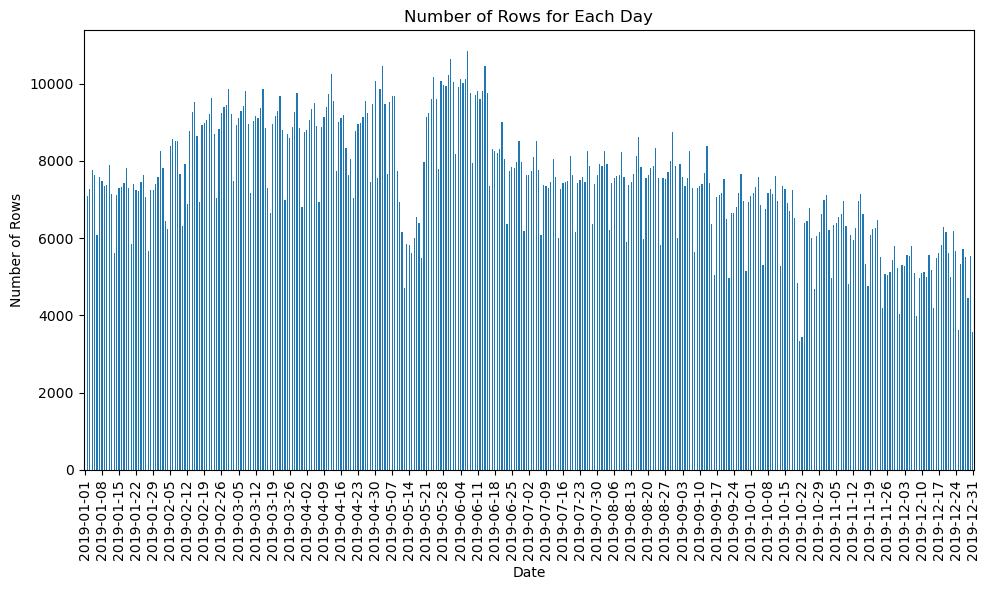

In [26]:
daily_counts = combined_df['local_date'].value_counts().sort_index()

# Generate custom xticks starting from the first date and then incrementing by 7 days
start_date = daily_counts.index.min()
end_date = daily_counts.index.max()
custom_xticks = pd.date_range(start=start_date, end=end_date, freq='7D')

# Plot the results
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar')
plt.title('Number of Rows for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Rows')
plt.xticks(ticks=range(len(daily_counts)), labels=daily_counts.index.strftime('%Y-%m-%d'), rotation=90)
plt.gca().set_xticks([i for i, date in enumerate(daily_counts.index) if date in custom_xticks])
plt.tight_layout()
plt.show()

## Check Minimum and Maximum

In [16]:
max_15_counts = daily_counts.nlargest(50)
max_15_counts

2019-04-21    1294
2019-04-20    1286
2019-04-18    1284
2019-04-19    1246
2019-04-17    1241
2019-04-26    1232
2019-04-13    1229
2019-03-16    1214
2019-04-27    1214
2019-04-12    1209
2019-04-15    1209
2019-04-22    1209
2019-05-04    1202
2019-03-15    1199
2019-05-03    1198
2019-03-29    1195
2019-03-01    1193
2019-04-16    1188
2019-04-25    1187
2019-04-05    1185
2019-03-22    1184
2019-03-02    1181
2019-03-08    1178
2019-04-14    1177
2019-04-28    1174
2019-03-17    1172
2019-03-30    1172
2019-05-02    1171
2019-04-06    1168
2019-03-09    1167
2019-04-24    1167
2019-04-30    1165
2019-04-23    1163
2019-05-05    1162
2019-03-23    1160
2019-01-04    1157
2019-06-14    1157
2019-02-16    1156
2019-05-06    1156
2019-06-07    1155
2019-01-01    1154
2019-01-02    1152
2019-06-15    1152
2019-07-27    1152
2019-02-22    1150
2019-01-03    1149
2019-02-23    1149
2019-04-11    1149
2019-05-07    1148
2019-02-15    1143
Name: local_date, dtype: int64

In [17]:
min_5_counts = daily_counts.nsmallest(15)
min_5_counts

2019-10-22    470
2019-12-31    540
2019-10-21    618
2019-12-09    814
2019-12-03    815
2019-12-10    815
2019-12-02    832
2019-12-11    832
2019-12-12    834
2019-12-04    836
2019-11-27    843
2019-11-26    848
2019-12-17    850
2019-11-25    854
2019-12-05    854
Name: local_date, dtype: int64

## Check for certain date  

In [17]:
# filtered_df = combined_df.loc[combined_df['local_date'] == 20190303]
combined_df.loc[combined_df['local_date'] == 20190606] 

,start_geohash5,end_geohash5,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
875378,qqgur,qqgur,20190606,12,39.270833,9.941667,70.315610,405.414295,113.306273,746.386234,2.166667,2.0,0.577350,20190606 00:00:00 - 03:00:00
875379,qqguy,qqguy,20190606,16,231.998958,81.358333,332.779776,4319.850613,168.966652,11676.514265,5.500000,2.5,9.640194,20190606 00:00:00 - 03:00:00
875380,qqgfq,qqgfq,20190606,15,85.544444,33.333333,154.537960,1317.678106,269.097417,1927.398117,3.533333,2.0,1.807392,20190606 03:00:00 - 06:00:00
875381,qqguf,qqguf,20190606,10,93.370000,12.683333,195.377210,812.319344,275.448132,1161.678883,4.000000,2.5,3.231787,20190606 03:00:00 - 06:00:00
875382,qqgum,qqgum,20190606,11,208.174242,82.900000,223.496149,827.034599,405.479831,1060.364062,3.454545,3.0,1.213560,20190606 03:00:00 - 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876943,w21yw,w21yw,20190606,12,19.475000,11.041667,16.322411,709.594302,294.551478,959.767465,4.333333,4.0,2.640018,20190606 21:00:00 - 24:00:00
876944,w21yx,w21yx,20190606,11,10.206061,8.916667,6.759213,569.291817,313.210936,672.033167,3.090909,3.0,1.375103,20190606 21:00:00 - 24:00:00
876945,w8589,w8589,20190606,13,33.858974,15.950000,37.008146,4359.593052,3575.397302,4061.405625,5.923077,5.0,3.707235,20190606 21:00:00 - 24:00:00
876946,w8pe0,w8pe0,20190606,14,34.098810,38.316667,17.488920,4842.463706,3147.762307,4228.142085,7.142857,6.0,4.240050,20190606 21:00:00 - 24:00:00


## Clean up and Export

In [54]:
combined_df

,start_geohash5,end_geohash5,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
0,qqguw,qqguw,20190101,16,104.120833,19.350000,184.642822,2143.339816,143.500191,7790.883820,4.375000,2.0,8.196544,20190101 00:00:00 - 03:00:00
1,qqguy,qqguy,20190101,10,229.833333,51.516667,388.190203,1101.053433,217.534516,1792.011639,3.600000,3.0,2.221111,20190101 00:00:00 - 03:00:00
2,qqguz,qqguz,20190101,12,295.563889,29.125000,433.627644,1073.624436,302.614625,1632.091928,8.000000,2.0,15.308940,20190101 00:00:00 - 03:00:00
3,qqgvn,qqgvn,20190101,11,53.818182,27.983333,72.212339,505.857722,223.295641,779.392660,3.363636,2.0,1.747726,20190101 00:00:00 - 03:00:00
4,qqw7x,qqw7x,20190101,14,31.852381,11.158333,78.936961,394.028203,155.601113,659.303884,2.571429,2.0,1.603567,20190101 00:00:00 - 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878513,w21yw,w21yw,20190606,12,19.475000,11.041667,16.322411,709.594302,294.551478,959.767465,4.333333,4.0,2.640018,20190606 21:00:00 - 24:00:00
878514,w21yx,w21yx,20190606,11,10.206061,8.916667,6.759213,569.291817,313.210936,672.033167,3.090909,3.0,1.375103,20190606 21:00:00 - 24:00:00
878515,w8589,w8589,20190606,13,33.858974,15.950000,37.008146,4359.593052,3575.397302,4061.405625,5.923077,5.0,3.707235,20190606 21:00:00 - 24:00:00
878516,w8pe0,w8pe0,20190606,14,34.098810,38.316667,17.488920,4842.463706,3147.762307,4228.142085,7.142857,6.0,4.240050,20190606 21:00:00 - 24:00:00


In [27]:
combined_df = combined_df.drop(['start_hour'], axis=1)
combined_df['local_date'] = combined_df['local_date'].dt.strftime('%Y%m%d').astype(int)
combined_df = combined_df.sort_values('local_time').reset_index(drop=True)
combined_df

,start_geohash5,end_geohash5,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
0,d58r3,d58r3,20190101,38,138.609649,28.675000,240.484195,2910.536860,730.993589,6516.849700,4.394737,3.5,2.908882,20190101 00:00:00 - 03:00:00
1,9emt1,9emt1,20190101,12,38.218056,37.016667,27.728377,95581.686307,1076.823333,165805.009664,9.583333,5.5,16.378802,20190101 00:00:00 - 03:00:00
2,9emt3,9emt3,20190101,19,127.021930,35.216667,206.714420,2333.297018,280.620909,3709.616775,6.578947,3.0,8.655864,20190101 00:00:00 - 03:00:00
3,9emu6,9emu6,20190101,32,50.431250,28.508333,86.915840,1442.532424,471.688065,2246.324599,8.562500,4.0,17.946044,20190101 00:00:00 - 03:00:00
4,9emu9,9emu9,20190101,29,93.983333,29.100000,221.896922,2590.535512,694.999919,5249.278276,6.275862,5.0,4.291990,20190101 00:00:00 - 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726357,d5f23,d5f23,20191231,22,30.937879,19.250000,26.100863,1505.176062,319.840815,3896.865714,6.363636,4.5,4.655212,20191231 21:00:00 - 24:00:00
2726358,d5f24,d5f24,20191231,30,24.222778,19.708333,22.164946,351.290029,290.624100,248.421119,5.900000,4.0,5.938478,20191231 21:00:00 - 24:00:00
2726359,9g6hm,9g6hk,20191231,10,30.443333,26.850000,18.638695,2847.856521,3262.478065,2138.214556,5.300000,5.0,4.295993,20191231 21:00:00 - 24:00:00
2726360,9u8dk,9u8dk,20191231,13,26.679487,14.533333,33.847219,1678.243160,791.247079,2845.765906,3.461538,4.0,1.664101,20191231 21:00:00 - 24:00:00


In [28]:
# Save the combined DataFrame to a new CSV file
folder_path = '/home/jovyan/Data/TJ/3h/od5_mx'
combined_df.to_csv(folder_path + '/od_mx_agg5_3h_final.csv', index=False)

In [10]:
file5 = '/home/jovyan/Data/TJ/3h/od5_id/od_id5_agg5_3h.csv'
df5 = pd.read_csv(file5)
df5['local_date'] = df5['local_date'].astype(int)
df5

,start_geohash5,end_geohash5,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
0,qqgur,qqgur,20190606,12,39.270833,9.941667,70.315610,405.414295,113.306273,746.386234,2.166667,2.0,0.577350,20190606 00:00:00 - 03:00:00
1,qqguy,qqguy,20190606,16,231.998958,81.358333,332.779776,4319.850613,168.966652,11676.514265,5.500000,2.5,9.640194,20190606 00:00:00 - 03:00:00
2,qqgfq,qqgfq,20190606,15,85.544444,33.333333,154.537960,1317.678106,269.097417,1927.398117,3.533333,2.0,1.807392,20190606 03:00:00 - 06:00:00
3,qqguf,qqguf,20190606,10,93.370000,12.683333,195.377210,812.319344,275.448132,1161.678883,4.000000,2.5,3.231787,20190606 03:00:00 - 06:00:00
4,qqgum,qqgum,20190606,11,208.174242,82.900000,223.496149,827.034599,405.479831,1060.364062,3.454545,3.0,1.213560,20190606 03:00:00 - 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,w21yw,w21yw,20190606,12,19.475000,11.041667,16.322411,709.594302,294.551478,959.767465,4.333333,4.0,2.640018,20190606 21:00:00 - 24:00:00
1566,w21yx,w21yx,20190606,11,10.206061,8.916667,6.759213,569.291817,313.210936,672.033167,3.090909,3.0,1.375103,20190606 21:00:00 - 24:00:00
1567,w8589,w8589,20190606,13,33.858974,15.950000,37.008146,4359.593052,3575.397302,4061.405625,5.923077,5.0,3.707235,20190606 21:00:00 - 24:00:00
1568,w8pe0,w8pe0,20190606,14,34.098810,38.316667,17.488920,4842.463706,3147.762307,4228.142085,7.142857,6.0,4.240050,20190606 21:00:00 - 24:00:00


In [12]:
final_df = pd.concat([filtered_df, df5], ignore_index=True)
final_df

,start_geohash5,end_geohash5,local_date,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,m_points_no,mdn_points_no,sd_points_no,local_time
0,qqguw,qqguw,20190101,16,104.120833,19.350000,184.642822,2143.339816,143.500191,7790.883820,4.375000,2.0,8.196544,20190101 00:00:00 - 03:00:00
1,qqguy,qqguy,20190101,10,229.833333,51.516667,388.190203,1101.053433,217.534516,1792.011639,3.600000,3.0,2.221111,20190101 00:00:00 - 03:00:00
2,qqguz,qqguz,20190101,12,295.563889,29.125000,433.627644,1073.624436,302.614625,1632.091928,8.000000,2.0,15.308940,20190101 00:00:00 - 03:00:00
3,qqgvn,qqgvn,20190101,11,53.818182,27.983333,72.212339,505.857722,223.295641,779.392660,3.363636,2.0,1.747726,20190101 00:00:00 - 03:00:00
4,qqw7x,qqw7x,20190101,14,31.852381,11.158333,78.936961,394.028203,155.601113,659.303884,2.571429,2.0,1.603567,20190101 00:00:00 - 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876943,w21yw,w21yw,20190606,12,19.475000,11.041667,16.322411,709.594302,294.551478,959.767465,4.333333,4.0,2.640018,20190606 21:00:00 - 24:00:00
876944,w21yx,w21yx,20190606,11,10.206061,8.916667,6.759213,569.291817,313.210936,672.033167,3.090909,3.0,1.375103,20190606 21:00:00 - 24:00:00
876945,w8589,w8589,20190606,13,33.858974,15.950000,37.008146,4359.593052,3575.397302,4061.405625,5.923077,5.0,3.707235,20190606 21:00:00 - 24:00:00
876946,w8pe0,w8pe0,20190606,14,34.098810,38.316667,17.488920,4842.463706,3147.762307,4228.142085,7.142857,6.0,4.240050,20190606 21:00:00 - 24:00:00
